In [1]:
# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random


import dataset, network, GPR_Model, prob_dist
import WGAN_Model

# Load data

In [2]:
# 2 n_features sets "sinus", "circle", "multi", "moons", "heter"
# 3 n_features sets "helix", "3d"

scenario = "moons"
n_instance = 500 # number of generated points
n_features = 2

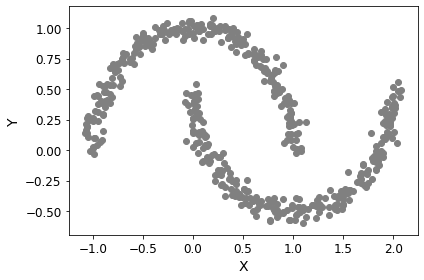

In [3]:
if scenario in ("3d", "helix") :
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.tight_layout()
    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

# WGAN

### Preprocessing

In [4]:
wgan = WGAN_Model.WGAN(n_features)

In [5]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train)

every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the data shape (10, 2)
every time the

### Training

In [6]:
hist = wgan.train(train_dataset, epochs=200)

Epoch 0/200
discriminator: -0.055075 - generator: -0.070165 - 3s
Epoch 1/200
discriminator: -0.021446 - generator: -0.244069 - 0s
Epoch 2/200
discriminator: 0.018950 - generator: -0.336204 - 0s
Epoch 3/200
discriminator: 0.088682 - generator: -0.393784 - 0s
Epoch 4/200
discriminator: 0.114787 - generator: -0.339969 - 0s
Epoch 5/200
discriminator: 0.068989 - generator: -0.316304 - 0s
Epoch 6/200
discriminator: 0.025166 - generator: -0.352176 - 0s
Epoch 7/200
discriminator: 0.073983 - generator: -0.316050 - 0s
Epoch 8/200
discriminator: -0.004830 - generator: -0.290444 - 0s
Epoch 9/200
discriminator: 0.022445 - generator: -0.273022 - 0s
Epoch 10/200
discriminator: -0.004814 - generator: -0.250392 - 0s
Epoch 11/200
discriminator: 0.018263 - generator: -0.257425 - 0s
Epoch 12/200
discriminator: 0.054155 - generator: -0.275624 - 0s
Epoch 13/200
discriminator: 0.012223 - generator: -0.255568 - 0s
Epoch 14/200
discriminator: 0.018691 - generator: -0.245867 - 0s
Epoch 15/200
discriminator: 0.0

discriminator: 0.210356 - generator: -0.281878 - 0s
Epoch 127/200
discriminator: 0.154239 - generator: -0.191350 - 0s
Epoch 128/200
discriminator: 0.300692 - generator: -0.136598 - 0s
Epoch 129/200
discriminator: 0.164260 - generator: -0.160148 - 0s
Epoch 130/200
discriminator: 0.129009 - generator: 0.018566 - 0s
Epoch 131/200
discriminator: 0.027295 - generator: -0.077988 - 0s
Epoch 132/200
discriminator: -0.150410 - generator: 0.066478 - 1s
Epoch 133/200
discriminator: -0.393825 - generator: 0.234366 - 1s
Epoch 134/200
discriminator: -0.383276 - generator: 0.245053 - 0s
Epoch 135/200
discriminator: -0.116504 - generator: 0.309414 - 0s
Epoch 136/200
discriminator: -0.234218 - generator: 0.465957 - 0s
Epoch 137/200
discriminator: -0.428739 - generator: 0.518980 - 1s
Epoch 138/200
discriminator: -0.377906 - generator: 0.416607 - 0s
Epoch 139/200
discriminator: -0.401565 - generator: 0.315278 - 0s
Epoch 140/200
discriminator: -0.533369 - generator: 0.406923 - 0s
Epoch 141/200
discriminat

Loss: 


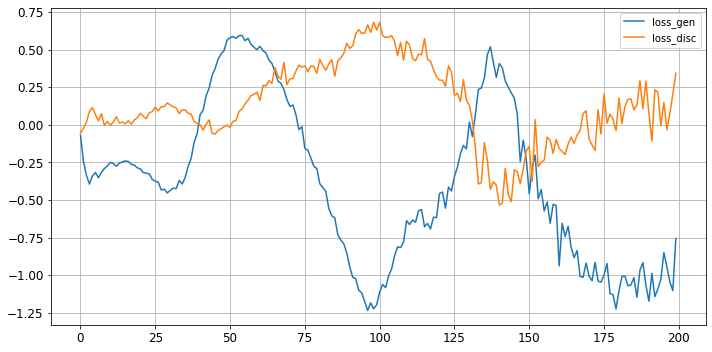

In [7]:
# plot loss
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])
#ax.set_yscale('log')
ax.grid()
plt.tight_layout()

### Prediction

In [8]:
# define these for desired prediction
x_input = 0
n_points = 10
y_min = -1
y_max = -1


# produces an input of fixed x coordinates with random y values
predictthis = np.full((n_points, 2), x_input)
for n in range(n_points):
    predictthis[n,1] = random.uniform(y_min, y_max)
    
predictthis_scaled = scaler.fit_transform(predictthis)*2 - 1

In [9]:
X_generated = wgan.predict(predictthis_scaled, scaler)

Optimizing latent space for point  0  /  10
Optimizing latent space for point  1  /  10
Optimizing latent space for point  2  /  10
Optimizing latent space for point  3  /  10
Optimizing latent space for point  4  /  10
Optimizing latent space for point  5  /  10
Optimizing latent space for point  6  /  10
Optimizing latent space for point  7  /  10
Optimizing latent space for point  8  /  10
Optimizing latent space for point  9  /  10


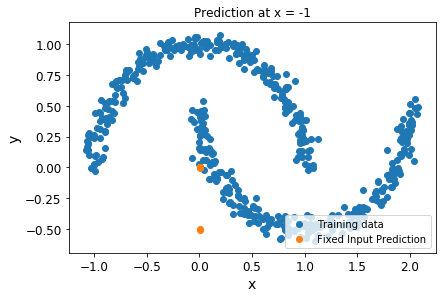

In [10]:
if scenario in ("3d", "helix"):
    ax = plt.subplot(projection='3d')

    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
else:
    plt.title("Prediction at x = -1")
    plt.scatter(X_train, y_train, label="Training data")
    plt.scatter(X_generated[:,0], X_generated[:,1], label="Fixed Input Prediction")
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.xlabel("x")
    plt.ylabel("y")